# Lab 2: Linear regression, part 2

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [33]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")

# Reindex and add clock speed column
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 

_2.	Create NumPy arrays X and y from the data.  The target variable y should come from column 'prp' of df.  For X, choose two other columns of df._

In [34]:
#get target variable 
y = df['prp'].values

#get predictors
predictors = ['mmin', 'chmax']
X=df[predictors].values

_3.	Create training and test sets using train_test_split().  Use Scikit-Learn's LinearRegression class to create a linear model from X_train and y_train._

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

_4.	What are the coefficients of your model?_

In [40]:
print("mmin: {:.2f}".format(reg.coef_[0]))
print("chmax: {:.2f}".format(reg.coef_[1]))

mmin: 0.03
chmax: 2.47


_5.	Are both the predictor variables of your model important in predicting ‘prp’?_

In [41]:
#Accuracy with both predictors:
r1 = reg.score(X_train, y_train) 
print('R-squared with both predictors : {:.2f}'.format(r1))

# Test accuracy with only one predictor 
predictions = ['mmax']
target = 'prp'
X = df[predictions].values
y = df[target].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42) 
reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

r2 = reg2.score(X_train2, y_train2) 
print('R-squared with one predictor : {:.2f}'.format(r2))

# Yes, both of these predictors used together result in a higher r squared value. 

R-squared with both predictors : 0.74
R-squared with one predictor : 0.66


_6.	What is the R-squared value for your model?  (Use X_train and y_train to get the R-squared value.)  Did you get a good R-squared value?  What's the best possible R-squared value?_

In [42]:
r1 = reg.score(X_train, y_train) 
print('R-squared with both predictors : {:.2f}'.format(r1))
# A good r^2 value is .6 or larger

R-squared with both predictors : 0.74


_7.	Produce a scatterplot in which the predicted prp values are shown on the x axis and the actual prp values are shown on the y axis._

<AxesSubplot:>

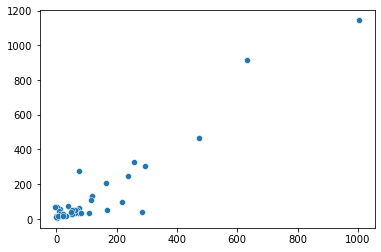

In [43]:
predicted = reg.predict(X_test)
sns.scatterplot(x=predicted, y=y_test)

_8.	Repeat steps 2-7 using a different pair of predictor variables._

Intercept: 22.30
min coefficient: 0.027
myct coefficient: -0.026
R-squared using score: 0.69


<AxesSubplot:>

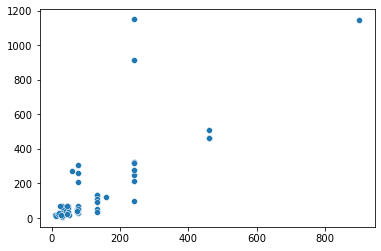

In [44]:
predictions = ['mmin', 'myct']
target = 'prp'
X = df[predictions].values
y = df[target].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42) 
reg1 = LinearRegression()
reg1.fit(X_train1, y_train1)

print('Intercept: {:.2f}'.format(reg1.intercept_)) 
print('min coefficient: {:.3f}'.format(reg1.coef_[0])) 
print('myct coefficient: {:.3f}'.format(reg1.coef_[1])) 

r1 = reg1.score(X_train1, y_train1) 
print('R-squared using score: {:.2f}'.format(r1))

predicted = reg1.predict(X_test1)
sns.scatterplot(x=predicted, y=y_test1)

_9.	Repeat steps 2-7 using all predictor variables.  Which predictors appear to be most important?_

Intercept: -19.53
0  coefficient: 0.019
1  coefficient: 0.013
2  coefficient: 0.004
3  coefficient: 0.712
4  coefficient: 3.642
5  coefficient: 0.031
6  coefficient: 0.028
R-squared using score: 0.87


<AxesSubplot:>

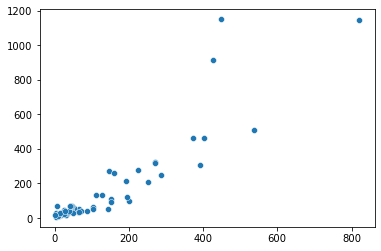

In [45]:
predictions = ['myct','mmin', 'mmax', 'cach', 'chmin', 'chmax', 'cs']
target = 'prp'
X = df[predictions].values
y = df[target].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42) 
reg1 = LinearRegression()
reg1.fit(X_train1, y_train1)

print('Intercept: {:.2f}'.format(reg1.intercept_)) 

for i in range(len(X[0])):
    print(i, ' coefficient: {:.3f}'.format(reg1.coef_[i])) 

r1 = reg1.score(X_train1, y_train1) 
print('R-squared using score: {:.2f}'.format(r1))

predicted = reg1.predict(X_test1)
sns.scatterplot(x=predicted, y=y_test1)

# It appears that chmin is the most important, given that it has the largest
# coefficient associated with it. 